# [APTOS 2019 Blindness Detection](https://www.kaggle.com/c/aptos2019-blindness-detection)
- #### **Goal**:- Detect diabetic retinopathy to stop blindness before it's too late

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Overview at EYE")
Image(url= "https://www.eylea.us/Content/images/rvo/understanding-rvo-img-1.png")

Overview at EYE


### Description:-
Imagine being able to detect blindness before it happened.

Millions of people suffer from [diabetic retinopathy](https://nei.nih.gov/health/diabetic/retinopathy), the leading cause of blindness among working aged adults. Aravind Eye Hospital in India hopes to detect and prevent this disease among people living in rural areas where medical screening is difficult to conduct. Successful entries in this competition will improve the hospital’s ability to identify potential patients. Further, the solutions will be spread to other Ophthalmologists through the 4th Asia Pacific Tele-Ophthalmology Society (APTOS) Symposium

Currently, Aravind technicians travel to these rural areas to capture images and then rely on highly trained doctors to review the images and provide diagnosis. Their goal is to scale their efforts through technology; to gain the ability to automatically screen images for disease and provide information on how severe the condition may be.

In this synchronous Kernels-only competition, you'll build a machine learning model to speed up disease detection. You’ll work with thousands of images collected in rural areas to help identify diabetic retinopathy automatically. If successful, you will not only help to prevent lifelong blindness, but these models may be used to detect other sorts of diseases in the future, like glaucoma and macular degeneration.

### Deadline

- August 29, 2019 - Entry deadline

- September 5, 2019 - Final submission deadline.

All deadlines are at **11:59 PM UTC** on the corresponding day unless otherwise noted.

### Quadratic weighted kappa

#### Evaluation metric:-

Submissions are scored based on the **quadratic weighted kappa**, which measures the agreement between two ratings. This metric typically varies from 0 (random agreement between raters) to 1 (complete agreement between raters). In the event that there is less agreement between the raters than expected by chance, this metric may go below 0. The quadratic weighted kappa is calculated between the scores assigned by the human rater and the predicted scores.

Images have five possible ratings, 0,1,2,3,4.  Each image is characterized by a tuple (e,e), which corresponds to its scores by Rater A (human) and Rater B (predicted).  The quadratic weighted kappa is calculated as follows. First, an N x N histogram matrix O is constructed, such that O corresponds to the number of images that received a rating i by A and a rating j by B. An N-by-N matrix of weights, w, is calculated based on the difference between raters' scores:

An N-by-N histogram matrix of expected ratings, E, is calculated, assuming that there is no correlation between rating scores.  This is calculated as the outer product between each rater's histogram vector of ratings, normalized such that E and O have the same sum.



#### Quadratic Kappa Metric is the same as cohen kappa metric in [Sci-kit learn sklearn.metrics.cohen_kappa_ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html) when weights are set to 'Quadratic'.

**quadratic_weighted_kappa**:-
  - calculates the quadratic weighted kappa value, which is a measure of inter-rater agreement between two raters
  - Potential values range from -1(representing complete disagreement) to 1 (representing complete agreement).  
  - A kappa value of 0 is expected if all agreement is due to chance.
  - quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b each correspond to a list of integer ratings.  These lists must have the same length.
  - The ratings should be integers, and it is assumed that they contain the complete range of possible ratings.
  - quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating is the minimum possible rating, and max_rating is the maximum possible rating.

Cohen kappa



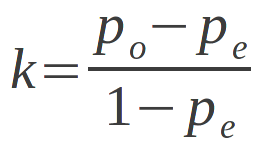

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Cohen kappa")
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQIAAACQCAMAAADUSJWeAAABcVBMVEX///88PDz29vZvb29sbGxHVKL69NNIPz49PT/+/ffd9/xARFtBPj3w3YNES3uk6vVdREB1zuo9PkO+8PhUQj/9+uf3/f4+QEvLc1NOZ8BBR2s+P0dgmNg+QVGnVkhBRmP9/PBlRkFFUI/w49i9ta+koqKqrbHAytbex7N6aFiSqcD15cOWjIJkWU6TeWBYe5/w2Lhei8OMT0Xkw59NXnKgr77d5++zooilvNPrzKJWe8f477pUcZG8e1Xt03n16KbVkF1/TERzSkL05ZRnrN/hsmmS5PPan2J1xedLXLP68sjK8/pUeLjGiFuayupahtJ8p9OdiXVXXmJyiJ5FTluFlKPMxsCHjZPO6ffZmYFydYjIn3ngs4J/tN1JW5GMWEejgFzGt6S7YU1bkJ2RsLbi5+5zl7N4ZlRRTkpeZXC9gHVze6rt2slleYfDlmSi1u/t04yHZ03mwG7Oe1Zintp/W0mzblGgXkvQ2cW6k5mvnZfvAmeLAAAGpUlEQVR4nO2ce1sbRRTGd0qaS0kVYxZi00DCJYAkWLkUai2XYkVRa6GheG0FrVAFrVao9tO7Z7JLNrvJzGYyO5nJzu+v3SUPZ/JmdufMOclrGBqNRqPRaDQajUaj0Wg0vWZicqo8PdwvYQJyHdV52zqemcWHhff5j05QGCbmKlU8oGuGOY8cPuA+OEFhWMlZoxkxbg2hBh+qG4aJBWswby0m0NLybWNiJQFjS76rbBgWUjCawfTgav30ThoG95GqYZi4i+fkx9ec83twOqZqGCbWPE+mdfu5pWYYJjacxcoGz1j3BT9XqHAJI4xReC65l6f71LHlEIVBLmGEUYIntfvCZigSMIQRRRxG8p77Cv54iMvVtwMUvuMSRhRbMJJP3FeycIV34iYoDBMPYCSfui6YcOGGomGYyHnXpi3flFUoDBML3g9jG8b2maJhWMDL8+fuKzDYPO+URVAYJnDeetN1YQcucM/dBYVhYs37mIIsjv8OTlAYJnDe+kXj3IS16ktVwzAx6snlvoJz/reooDBMQBHnauMUtvHJh8qGYQHnrV9fns7BUB8pG4YJnKC845xBYS8ZxtAEhWEC561LyzhVn9i1pmdhVeEwTNjb3sxeLAZV7uTjcB5RgsIwAZv2pLPLr+1/0/JFp5VqOtPuj/zCmCvVk8zevmB1UlDHvTnxZHJqqly+3fo15jxKnpUn51H+xzDDGItZK8xKAo2J1eAufa9inqMCXr7+QMk/wwtjfI8yEGbbvXKIwJe3+kg9c955Mdtc+OIaxvgBITzJtjy7qdDZ8O7ifWw32l5HzHUuepidBHqKD9ZEFxEgbyW2M6yPPuOM/ZVraeccxriwK6kw6Qgl1XXnkcqv0DDk3cV7WXPltRue4h/HMPF0/SYr/kTOmeJvKtUE/a7qAE/e2oKcS/Acq/j0MA/w34uHVbREzZl8JbiuaM5bW7HpKvWPsopPD2M9Zn6emk3UzlbpJWVfCa4rcN5K7GYMuXb52aYdP9cwltK/PJl+HuSf+UtwXXEESStR92xjzq0j1kWRHqYUXF1fCY4dc9JKeyFv3Rs4KLfNfe83JLhgehoGC1MKvt6uUe+qwDhfgELEB+zR5QzeSTOlrsHCLAR/VzjHEFl0fOlMuuJ5mGUe6309tQ9nKDrT7yrePEMFmL7mX6EWOazkEP06DMvi8RJlQwrdWNZEnQ3rvY8cTFWyqBZqkWPR0iC/d5LOP6Z8wLgVKbgPlzqcPUnWzpZDnnunFev9v1im1iRwisyYpPYJf3NNj5XkFUjAlqH1C5AeF+zjUXut/aenIxIONOKcvesh/mLzi2WJarECaG5IF62l2lXQ/C1G4fdeDJk31931EmvBzrhLuqOIwngvhsybbdem0zxHI00JazQkgPQ4Wb/3405pmwmaWhLQZuSbyKmXxEtokLWor7IERdh343rJXAmNddHeUlcCnB7D1nVuqDsF1JXAqZfcyoruu0mDXS+5k5Xmu1rCgWUvP7yIWwmSfFlLNNCTGV9MI9AgE8nNEu7JjKXRo5dw4GvORCFBxj0Z2BakoHw24n0gRiE7xD2Z/EPnyNtNiIIEuJ2Ik+JiyToqRHBddNVL8H4pYrUSw24n2pMZf4l5UIrf9YgEtxOdegnOkiJXSsbpsVMvicOUuBG1adD8g9d7bkGiAq6XXH7uO7BxFtta6z2eduJF9KaBt52In46Fs3KEsgNfO/F1PecLob1m7iau0l/Vx6RWsk2/oYkeM8cwtyIswelx/faKrATmbhpFWoIiPASW9v+NsASvUW1/2i5ORVSC/+rec1GWwEZLoCXQEhjhSSCX0yURfhLI7HRJhJ8EkjtdtofrjSCz02V7uEogsdMlAZ4SyOx0SYCnBDI7XRLgKYHMTpcE2kjAYnQptdMlgTYSsLg8Su10SYCnBCUkrdMliTYSMBhdSu10SYLj41Bmp0sSHCWQ2emSBEcJZHa6JMFRAomdLonwk0Bmp0si/CSQ2emSCD8JZHa6JMJPApmdLonwk0Bmp0si/CSQ2OmSDDcJZHa6JMNNgkBOl70x+COSujIDIx9/3mr73xlBnC57ZPDXjjeVgdhJY/Ob2YsNHHRz6wZwuuyVwV87Si2KAN34B0FtgOx02TODP0HQnS57Z/AnCLrTZUCDP3WhOl0GNfhTF6rTZScGf2pCdbrsxOBPTahOl5vBDf7UhO50Wep3cx6602VJgXJ6V9CdLjsw+FMTuidfBwZ/6hHM6bIDgz/1COZ0Gdzgr48JavCn0Wg0Go3xP1mO1ErA4VY+AAAAAElFTkSuQmCC")

- for more about **QWK** see [here](https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/97610#latest-577129)
- video [here](https://www.youtube.com/watch?v=DfNo32nL_fo)
- explained with code in pyton with steps [here](https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps)

### Submission Sample:-

**id_code, diagnosis**

0005cfc8afb6,   0

003f0afdcd15,   0

### Kernels only competition

This is a Kernels-only competition
Submissions to this competition must be made through Kernels. Your kernel will re-run automatically against an unseen test set, and needs to output a file named submission.csv. You can still train a model offline, upload it as a dataset, and use the kernel exclusively to perform inference.
In order for the "Submit to Competition" button to be active after a commit, the following conditions must be met:

- CPU or GPU Kernels <= 9 hours run-time
- Internet must be turned off , In synchronous KO competitions, note that a submission that results in an error--either within the kernel or within the process of scoring--will count against your daily submission limit and will not return the specific error message. This is necessary to prevent probing the private test set.

Please see the [Kernels-only FAQ](https://www.kaggle.com/docs/competitions#kernels-only-FAQ) for more information on how to submit.

## Facts About Diabetic Eye Disease

- 1.Diabetic eye disease comprises a group of eye conditions that affect people with diabetes. These conditions include diabetic retinopathy, diabetic macular edema (DME), cataract, and glaucoma.
- 2.All forms of diabetic eye disease have the potential to cause severe vision loss and blindness.
- 3.Diabetic retinopathy involves changes to retinal blood vessels that can cause them to bleed or leak fluid, distorting vision.
- 4.Diabetic retinopathy is the most common cause of vision loss among people with diabetes and a leading cause of blindness among working-age adults.
- 5.DME is a consequence of diabetic retinopathy that causes swelling in the area of the retina called the macula.
- 6.Controlling diabetes—by taking medications as prescribed, staying physically active, and maintaining a healthy diet—can prevent or delay vision loss.
- 7.Because diabetic retinopathy often goes unnoticed until vision loss occurs, people with diabetes should get a comprehensive dilated eye exam at least once a year.
- 8.Early detection, timely treatment, and appropriate follow-up care of diabetic eye disease can protect against vision loss.
- 9.Diabetic retinopathy can be treated with several therapies, used alone or in combination.
- 10.NEI supports research to develop new therapies for diabetic retinopathy, and to compare the effectiveness of existing therapies for different patient groups.


### What is diabetic eye disease?

- **Diabetic eye disease** can affect many parts of the eye, including the retina, macula, lens and the optic nerve.
- **Diabetic eye disease** is a group of eye conditions that can affect people with diabetes.

**Diabetic retinopathy** affects blood vessels in the light-sensitive tissue called the retina that lines the back of the eye. It is the most common cause of vision loss among people with diabetes and the leading cause of vision impairment and blindness among working-age adults.

**Diabetic macular edema (DME)**. A consequence of diabetic retinopathy, DME is swelling in an area of the retina called the macula.
Diabetic eye disease also includes cataract and glaucoma:

- **Cataract** is a clouding of the eye’s lens. Adults with diabetes are 2-5 times more likely than those without diabetes to develop cataract. Cataract also tends to develop at an earlier age in people with diabetes.
- **Glaucoma** is a group of diseases that damage the eye’s optic nerve—the bundle of nerve fibers that connects the eye to the brain. Some types of glaucoma are associated with elevated pressure inside the eye. In adults, diabetes nearly doubles the risk of glaucoma.

All forms of diabetic eye disease have the potential to cause severe vision loss and blindness.

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Overview at EYE")
Image(url= "https://nei.nih.gov/sites/default/files/health-images/macula_dr.gif")


Overview at EYE


## Diabetic Retinopathy

Chronically high blood sugar from diabetes is associated with damage to the tiny blood vessels in the retina, leading to diabetic retinopathy. The retina detects light and converts it to signals sent through the optic nerve to the brain. Diabetic retinopathy can cause blood vessels in the retina to leak fluid or hemorrhage (bleed), distorting vision. In its most advanced stage, new abnormal blood vessels proliferate (increase in number) on the surface of the retina, which can lead to scarring and cell loss in the retina.

### Labels/Stages/outputs to predict

- **0.No DR**
- **1.Mild nonproliferative retinopathy:-**
    - earliest stage of the disease.
    - Small areas of balloon-like swelling in the retina’s tiny blood vessels.
    - This may leak fluid into retina.
- **2.Moderate nonproliferative:-**
    -  blood vessels that nourish the retina may swell and distort.
    -  Blodd vessels may also lose their ability to transport blood.
    -  Both conditions cause characteristic changes to the appearance of the retina and may contribute to DME.
- **3.Severe nonproliferative:-**
    -  Many more blood vessels are blocked, depriving blood supply to areas of the retina.
    -  These areas secrete growth factors that signal the retina to grow new blood vessels.
- **4.Proliferative:-**
    -  At this advanced stage, growth factors secreted by the retina trigger the proliferation of new blood vessels, which grow along the inside surface of the retina and into the vitreous gel, the fluid that fills the eye. 
    - The new blood vessels are fragile, which makes them more likely to leak and bleed. 
    - Accompanying scar tissue can contract and cause *retinal detachment*—the pulling away of the retina from underlying tissue, like wallpaper peeling away from a wall.
    - *Retinal detachment* can lead to permanent vision loss.

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Stages through pics")
Image(url= "https://i2.wp.com/blog.kaggle.com/wp-content/uploads/2015/08/dr5_3.png?w=512")


Stages through pics


### Sample Dataset

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Sample Dataset")
Image(url= "https://www.kaggleusercontent.com/kf/17584966/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..xIms8JQSKPHiAoQKhfMCtg.neNa1Rn-aPE3GmfwSxGvlvNXYO-yft4m2hFereU41fAs34s6csA11k0Wh08VwZtUVsBzG5FfUT8Jeg7ToylBHP6RJARU95-2MJJP_kwnKXFjHU756GjbN7NLX2fIfh7DQL3LjLd7ogo87TbFQAH7LjakI-qPf8pDuJzUCdfUymgiQ-Ndbzgk2E6tXpPgR1wK.mYkJ_be7qd_xQLYhrc7v7A/__results___files/__results___10_1.png")


Sample Dataset


- **Train set:-** 3662 images 8.01GB
- **Test set:-** 1928 images 1.5GB

#### Most used models

- **Densenet**
- **Resnet**
- **Imagenet**